In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

#### Data Collection and Pre-processing

In [2]:
# loading the data
df = pd.read_csv('./data/car data.csv')

In [3]:
# inspecting the first five rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the number of rows and columns
df.shape

(301, 9)

In [5]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# chekcing the distribution of categorical data
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [8]:
df.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [9]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [10]:
df_seller_type = df['Seller_Type'].value_counts().to_frame()

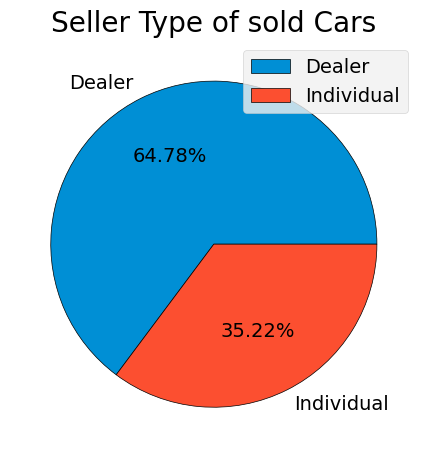

In [11]:
# plotting pie chart for fuel type of cars
plt.figure(layout='tight')
plt.style.use('fivethirtyeight')
plt.title('Seller Type of sold Cars')
plt.pie(df_seller_type['count'],labels=df_seller_type.index,autopct=lambda x: f'{x:.2f}%',wedgeprops={'edgecolor': 'black'})
plt.legend(loc='upper right')
# plt.savefig('./screenshots/Seller Type - Pie Chart')
plt.show()

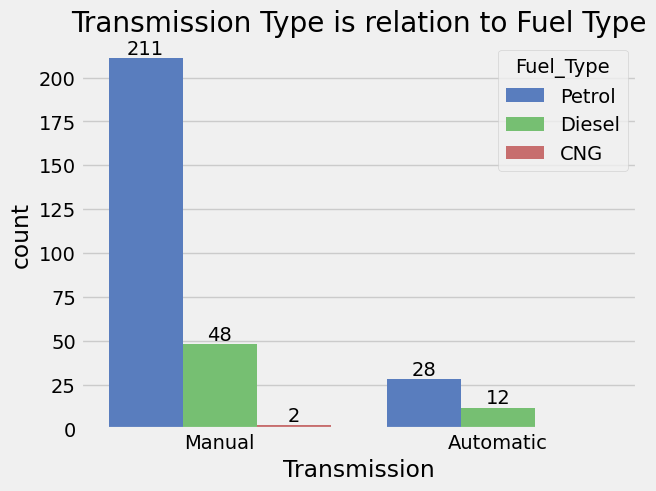

In [12]:
# plotting countplot for Transmission type and Fuel Type
plt.style.use('seaborn-v0_8-muted')
plt.title('Transmission Type is relation to Fuel Type')
ax = sns.countplot(x='Transmission',hue='Fuel_Type',data=df)
for container in ax.containers:
    ax.bar_label(container)
# plt.savefig('./screenshots/Transmission Type vs Fuel Type - CountPlot')
plt.show()

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Data Pre-processing / Encoding the Categorical data

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
matrix = encoder.fit_transform(df[['Fuel_Type']]).toarray()

In [15]:
column_names = ['CNG','Diesel','Petrol']
for i in range(len(matrix.T)):
    df[column_names[i]] = matrix.T[i]

In [16]:
df2 = df.drop(columns=['Petrol','Fuel_Type'],axis=1)

KeyError: "['Perol'] not found in axis"

In [ ]:
df3 = df2.copy()

In [ ]:
df3 = df3.replace({'Transmission':{'Manual':0,'Automatic':1},
                   'Seller_Type':{'Dealer':0,'Individual':1},
                  })

In [ ]:
df3

In [ ]:
# plotting the heatmap
sns.heatmap(df3.corr(numeric_only=True),annot=True,fmt='.2f',cmap='YlGnBu')
plt.show()

#### spliting the test and training data

In [ ]:
X = df3.drop(columns=['Selling_Price','Car_Name'],axis=1)
y = df3['Selling_Price']

In [ ]:
X

In [ ]:
y

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

#### Model Training
#### Linear Regression

In [ ]:
# loading the linear regression classifier
lin_reg = LinearRegression()

In [ ]:
lin_reg_model = lin_reg.fit(X_train,y_train)

#### Model Evaluation

In [ ]:
# checking overfitting
lin_reg_model.score(X_train,y_train)

In [ ]:
# scoring with test data
lin_reg_model.score(X_test,y_test)

#### Visualize the actual prices and Predicted prices

In [ ]:
plt.figure(layout='tight')
plt.style.use('fivethirtyeight')
plt.title('Actual vs Predicted Prices on Test Data')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.scatter(y_test, lin_reg_model.predict(X_test))
# plt.savefig('./screenshots/Actual vs Predicted Prices on Test Data - Linear Regression')
plt.show()

#### Lasso Regression

In [ ]:
# loading the lasso regression
las_reg = Lasso()

In [ ]:
las_reg_model = las_reg.fit(X_train,y_train)

#### Model evaluation

In [ ]:
# checking for overfitting
las_reg_model.score(X_train,y_train)

In [ ]:
# scoring for test data
las_reg_model.score(X_test,y_test)

In [ ]:
plt.figure(layout='tight')
plt.style.use('fivethirtyeight')
plt.title('Actual vs Predicted Prices on Test Data')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.scatter(y_test, las_reg_model.predict(X_test))
# plt.savefig('./screenshots/Actual vs Predicted Prices on Test Data - Lasso Regression')
plt.show()